In [1]:
# Import Statements
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://www.theverge.com/tldr/2018/2/5/16974194/spotify-recommendation-algorithm-playlist-hack-nelson
# https://opendatascience.com/a-machine-learning-deep-dive-into-my-spotify-data/
# https://medium.com/cuepoint/visualizing-hundreds-of-my-favorite-songs-on-spotify-fe50c94b8af3
# https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features

In [2]:
# Assign %pwd to working_dir
working_dir = %pwd

In [3]:
# spotify = pd.read_csv( (working_dir)+"/Data/spotify-pre_processed.csv", delimiter = ",")
spotify = pd.read_csv( (working_dir)+"/Data/data.csv", delimiter = ",")
#spotify

# Datatypes for each attribute.

In [4]:
spotify.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

# General characteristics for the numeric attributes (means, standard deviations, and other statistics)

In [5]:
spotify.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


### Acousticness:  
### A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

### Does not follow a normal distribution.  Most of the acousticness appears to occur in the .00 and .95 range.

Mean:   0.499
Median: 0.517
Mode:   0.995
Skew:  -0.035


<AxesSubplot:ylabel='Frequency'>

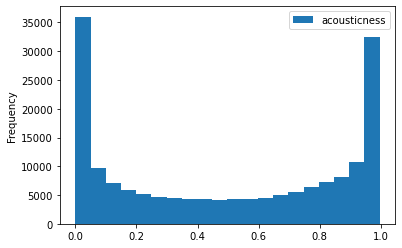

In [6]:
print('Mean:   {:,.3f}'.format(spotify[['acousticness']].mean().values[0]))
print('Median: {}'.format(spotify[['acousticness']].median().values[0]))
print('Mode:  {}'.format(spotify[['acousticness']].mode().to_string(header=None,index=False)))
print('Skew:  {:,.3f}'.format(spotify[['acousticness']].skew().values[0]))
spotify[['acousticness']].plot(kind="hist", bins=20)

### Top 10 Songs by Acousticness

In [7]:
spotify[['artists', 'name', 'acousticness']].nlargest(10, 'acousticness')

,artists,name,acousticness
5,['Mamie Smith & Her Jazz Hounds'],Crazy Blues - 78rpm Version,0.996
7,['Mamie Smith & Her Jazz Hounds'],Arkansas Blues,0.996
8,['Francisco Canaro'],La Chacarera - Remasterizado,0.996
11,['Francisco Canaro'],Desengaño - Remasterizado,0.996
17,['Francisco Canaro'],El Africano - Remasterizado,0.996
32,['Maurice Chevalier'],Oh Maurice,0.996
56,['Mamie Smith & Her Jazz Hounds'],Frankie Blues,0.996
59,['Mamie Smith & Her Jazz Hounds'],The Darktown Flappers' Ball,0.996
63,['Francisco Canaro'],El Baccarat - Remasterizado,0.996
80,['Mamie Smith & Her Jazz Hounds'],Mean Daddy Blues,0.996


### Bottom 10 Songs by Acousticness

In [8]:
spotify[['artists', 'name', 'acousticness']].nsmallest(10, 'acousticness')

,artists,name,acousticness
18946,"['White Noise Meditation', 'Lullaby Land', 'Wh...",Brown Noise - Loopable with No Fade,0.0
23004,['Benny Goodman'],Pause Track - Live,0.0
23073,['Benny Goodman'],Pause Track - Live,0.0
36275,['Thomas Bronzwaer'],Close Horizon [ASOT 229] - Original Mix,0.0
36551,['Re:Locate'],Rogue [ASOT 281] - Original Mix,0.0
57621,"['Ferry Corsten', 'Cosmic Gate']",Event Horizon (Mix Cut),0.0
62366,['Future Rapper'],StaggerLee Has His Day at the Beach,0.0
62458,['Sarah Vaughan'],Pause Track,0.0
75557,"['Armin van Buuren', 'Mark Sixma']",Panta Rhei (Mix Cut) - Original Mix,0.0
75784,"['Brown Noise for Babies', 'White Noise for De...",Brown Noise,0.0


### Danceability:  
### Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

### It's not quite a normal distribution, it appears to skew to the left.

Mean:   0.537
Median: 0.548
Mode:   0.565
Skew:  -0.236


<AxesSubplot:ylabel='Frequency'>

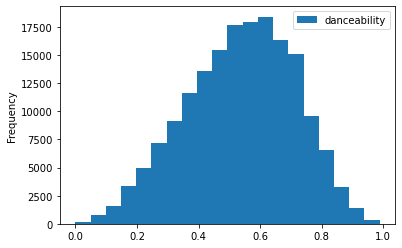

In [9]:
print('Mean:   {:,.3f}'.format(spotify[['danceability']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['danceability']].median().values[0]))
print('Mode:  {}'.format(spotify[['danceability']].mode().to_string(header=None,index=False)))
print('Skew:  {:,.3f}'.format(spotify[['danceability']].skew().values[0]))
spotify[['danceability']].plot(kind="hist", bins=20)

### Top 10 Songs by Danceability

In [10]:
spotify[['artists', 'name', 'danceability']].nlargest(10, 'danceability')

,artists,name,danceability
13734,['Tone-Loc'],Funky Cold Medina,0.988
54525,"['Spooner Street', 'Rio Dela Duna', 'Leonardo ...",Cool - Leonardo La Mark Remix,0.987
141441,"['Pitbull', 'Trina', 'Young Bo']",Go Girl,0.986
37455,['Tone-Loc'],Funky Cold Medina - Re-Recorded,0.985
92739,['Nilla Pizzi'],O mama mama - Remix 2014,0.985
171536,"['Dan McKie', 'Zigmund Slezak']",Dddance - Zigmund Slezak Remix,0.985
173266,['Michael Beyer'],Stuck in Your Brain,0.982
13910,['Vanilla Ice'],Ice Ice Baby,0.980
39276,['347aidan'],Dancing in My Room,0.980
51218,"['The Jacksons', 'Mick Jagger']",State of Shock,0.980


### Bottom 10 Songs by Danceability

In [11]:
spotify[['artists', 'name', 'danceability']].nsmallest(10, 'danceability')

,artists,name,danceability
758,['Ignacio Corsini'],La Mina del Ford - Remasterizado,0.0
845,['Francisco Canaro'],Oh Mujer Mujer - Remasterizado,0.0
860,['Ignacio Corsini'],Shangai Bay - Remasterizado,0.0
2820,['The Moors'],Santa Claus Is Coming To Town,0.0
3302,['Billie Holiday'],Back In Your Own Backyard - Take 1,0.0
3796,['MGM Studio Orchestra'],Munchkinland Insert - Alternate Tag,0.0
3806,"['Bert Lahr', 'Judy Garland', 'Ray Bolger', 'B...",If I Were King of the Forest - Partial Take; A...,0.0
4211,['The Slobs'],The Christmas Raid,0.0
5830,['Charlie Parker'],"Embraceable You - Live At Carnegie Hall, New Y...",0.0
8758,['Louis Armstrong'],"Hello, Dolly!",0.0


### Energy:  
### Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
### Does not follow a normal distribution.  The distribution skews to the right.

Mean:   0.483
Median: 0.465
Mode:   0.195
Skew:   0.144


<AxesSubplot:ylabel='Frequency'>

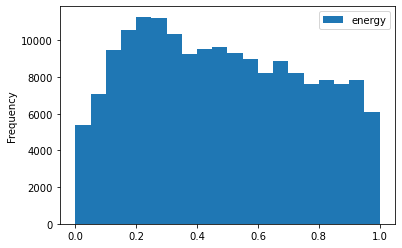

In [12]:
print('Mean:   {:,.3f}'.format(spotify[['energy']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['energy']].median().values[0]))
print('Mode:  {}'.format(spotify[['energy']].mode().to_string(header=None,index=False)))
print('Skew:   {:,.3f}'.format(spotify[['energy']].skew().values[0]))
spotify[['energy']].plot(kind="hist", bins=20)

### Top 10 Songs by Energy

In [13]:
spotify[['artists', 'name', 'energy']].nlargest(10, 'energy')

,artists,name,energy
3543,['Benny Goodman'],Applause; Benny Goodman's 'No Encore' Announce...,1.0
3563,['Benny Goodman'],Applause; Transition Back to Goodman Orchestra...,1.0
23044,['Benny Goodman'],Applause as Lionel Hampton Enters - Live,1.0
39601,['Maurice Chevalier'],Moi J'fais Mes Coups En Dessous,1.0
41853,['Benny Goodman'],Applause; Martha Tilton Returns to Stage - Live,1.0
56761,['Komprex'],Victim,1.0
56805,"['Running Man', 'SoundLift']",Amnesia (Mix Cut) - SoundLift’s Emotional Take,1.0
56927,['Adam Ellis'],Napalm Poet (Mix Cut) - Original Mix,1.0
56957,"['ReOrder', 'STANDERWICK', 'Sky Patrol']",Folding Your Universe (Mix Cut) - Original Mix,1.0
56961,"['Sneijder', 'Bryan Kearney']",Proper Order (Mix Cut) - Original Mix,1.0


### Bottom 10 Songs by Energy

In [14]:
spotify[['artists', 'name', 'energy']].nsmallest(10, 'energy')

,artists,name,energy
23004,['Benny Goodman'],Pause Track - Live,0.00000
23073,['Benny Goodman'],Pause Track - Live,0.00000
62366,['Future Rapper'],StaggerLee Has His Day at the Beach,0.00000
62458,['Sarah Vaughan'],Pause Track,0.00000
138635,['Time Bomb Symphony'],You R Heaven,0.00000
144701,['Sarah Vaughan'],Pause Track,0.00000
146842,['Connie Francis'],Hava Nagilah,0.00000
143634,['Apocolothoth'],Fluoxetin,0.00002
18946,"['White Noise Meditation', 'Lullaby Land', 'Wh...",Brown Noise - Loopable with No Fade,0.00002
75784,"['Brown Noise for Babies', 'White Noise for De...",Brown Noise,0.00002


### Instrumentalness:  
### Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal.” The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content and is purely instrumental, so for example a classical symphony (with no choral part) would be close to 1.0. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

### Does not follow a normal distribution. Appears to skew to the right.  Most of the instrumentalness occurs at the .00 range. 

Mean:   0.197
Median: 0.001
Mode:   0.0
Skew:   1.364


<AxesSubplot:ylabel='Frequency'>

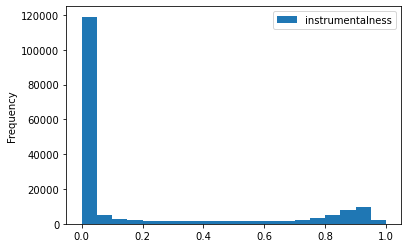

In [15]:
print('Mean:   {:,.3f}'.format(spotify[['instrumentalness']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['instrumentalness']].median().values[0]))
print('Mode:  {}'.format(spotify[['instrumentalness']].mode().to_string(header=None,index=False)))
print('Skew:   {:,.3f}'.format(spotify[['instrumentalness']].skew().values[0]))
spotify[['instrumentalness']].plot(kind="hist", bins=20)

### Top 10 Songs by Instrumentalness

In [16]:
spotify[['artists', 'name', 'instrumentalness']].nlargest(10, 'instrumentalness')

,artists,name,instrumentalness
19302,"['Erik Eriksson', 'White Noise Baby Sleep', 'W...",Clean White Noise - Loopable with no fade,1.000
38892,['High Altitude Samples'],Soft Brown Noise,1.000
76018,['High Altitude Samples'],Cabin Back Noise,1.000
93318,"['Erik Eriksson', 'White Noise for Babies', 'W...",Pure Brown Noise - Loopable with no fade,1.000
125791,"['Erik Eriksson', 'Lullabies for Deep Meditati...",White Noise - Loopable With No Fade,1.000
142261,['Zen Sounds'],White Noise: Mindfulness Meditations (Loopable),1.000
157709,['The White Noise Zen & Meditation Sound Lab'],Calm Rain Storm & Gentle White Noise,1.000
61338,['K Dutta'],Suno Suno Tumhen Sunaye,0.999
70239,['Nataural'],Under Shelter Rain,0.999
92672,"['Sleep Baby Sleep', 'Meditation Spa', 'White ...",Pouring Rain - Loopable with No Fade,0.999


### Bottom 10 Songs by Instrumentalness

In [17]:
spotify[['artists', 'name', 'instrumentalness']].nsmallest(10, 'instrumentalness')

,artists,name,instrumentalness
10,['Dorville'],Oouin,0.0
23,['Ron van der Kraan'],Sweet Reggae Music,0.0
28,['ST'],Comme à l'époque,0.0
30,['Félix Mayol'],Bou Dou Ba Da Bouh,0.0
33,['David Daniells'],Jesus Paid It All,0.0
36,"[""The Swingin' Bachelors""]",Penticton Kitty,0.0
41,['Esther Lekain'],Ca N'vaut Pas L'amour,0.0
43,"['Broke God', 'Pcxix']",#NOHOOK,0.0
46,"[""The Swingin' Bachelors""]",Cloud 9,0.0
48,"['ST', '98', 'Niklas O']",YP,0.0


### Key:  
### The key the track is in.  Integers map to the pitches using standard Pitch Class notation. 
### E.g. 0 = C, 1 = C♯, D♭, 2 = D, 3 = D♯, E♭, 4 = E, 5 = F, 6 = F♯, G♭, 7 = G, 8 = G♯, A♭, 9 = A, 10 = A♯, B♭, 11 = B

### https://en.wikipedia.org/wiki/Pitch_class

### Does not follow a normal distribution.  It appears to be sparsely populated, which makes sense as there is no one dominant key in all of western music.

Mean:   5.205
Median: 5.000
Mode:   0
Skew:   0.004


<AxesSubplot:ylabel='Frequency'>

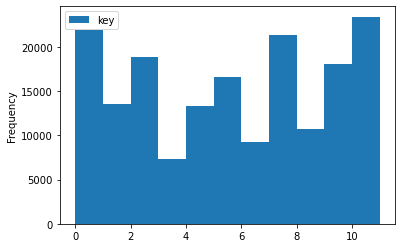

In [18]:
print('Mean:   {:,.3f}'.format(spotify[['key']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['key']].median().values[0]))
print('Mode:  {}'.format(spotify[['key']].mode().to_string(header=None,index=False)))
print('Skew:   {:,.3f}'.format(spotify[['key']].skew().values[0]))
spotify[['key']].plot(kind="hist", bins=11)

### Liveness:  
### Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

### Does not follow a not follow a normal distribution.  Appears to skew to the right.  Most of the liveness occurs at the .1 range.

Mean:   0.211
Median: 0.138
Mode:   0.111
Skew:   2.078


<AxesSubplot:ylabel='Frequency'>

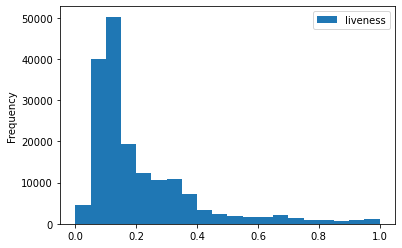

In [19]:
print('Mean:   {:,.3f}'.format(spotify[['liveness']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['liveness']].median().values[0]))
print('Mode:  {}'.format(spotify[['liveness']].mode().to_string(header=None,index=False)))
print('Skew:   {:,.3f}'.format(spotify[['liveness']].skew().values[0]))
spotify[['liveness']].plot(kind="hist", bins=20)

### Top 10 Songs by Liveness

In [20]:
spotify[['artists', 'name', 'liveness']].nlargest(10, 'liveness')

,artists,name,liveness
170448,['The Band'],Up on Cripple Creek - Concert Version,1.000
63836,['Duke Ellington'],Skin Deep - Live,0.999
105900,['Fleetwood Mac'],The Chain - Live at Warner Brothers Studios in...,0.998
31937,['Cheryl Lynn'],Encore,0.997
68656,['Eagles'],Life in the Fast Lane - Live; 1999 Remaster,0.997
85274,['Bob Marley & The Wailers'],Trenchtown Rock - Live At The Roxy Theatre,0.997
154512,['Banda Maguey'],Pero Te Amo - Live Version,0.997
15981,['Billy Joel'],Auld Lang Syne - Live at Madison Square Garden...,0.996
35027,['Bee Gees'],Islands In The Stream - Live At The MGM Grand/...,0.996
84934,['KISS'],Strutter - Live/1975,0.996


### Bottom 10 Songs by Liveness

In [21]:
spotify[['artists', 'name', 'liveness']].nsmallest(10, 'liveness')

,artists,name,liveness
18946,"['White Noise Meditation', 'Lullaby Land', 'Wh...",Brown Noise - Loopable with No Fade,0.0
20399,['Players_Select'],"Game over (From ""Streets of Rage"") [Genesis Mix]",0.0
23004,['Benny Goodman'],Pause Track - Live,0.0
23073,['Benny Goodman'],Pause Track - Live,0.0
62366,['Future Rapper'],StaggerLee Has His Day at the Beach,0.0
62458,['Sarah Vaughan'],Pause Track,0.0
75784,"['Brown Noise for Babies', 'White Noise for De...",Brown Noise,0.0
125534,"['Todd Glass', 'Blake Wexler']",The Shortest Message (2015),0.0
138635,['Time Bomb Symphony'],You R Heaven,0.0
143634,['Apocolothoth'],Fluoxetin,0.0


### Loudness:  
### The overall loudness of a track in decibels (db).  Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.  Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).  Values typical range between -60 and 0 db.

### Does not follow a normal distribution.  Appears to skew to the left.  Most of the loudness occurs at -10db.

Mean:   -11.751
Median: -10.836
Mode:    -7.578
Skew:    -0.989


<AxesSubplot:ylabel='Frequency'>

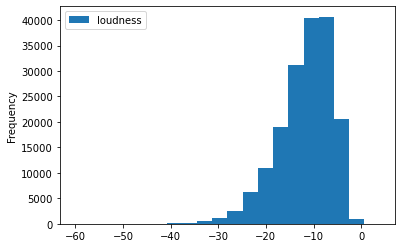

In [22]:
print('Mean:   {:,.3f}'.format(spotify[['loudness']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['loudness']].median().values[0]))
print('Mode:    {}'.format(spotify[['loudness']].mode().to_string(header=None,index=False)))
print('Skew:    {:,.3f}'.format(spotify[['loudness']].skew().values[0]))
spotify[['loudness']].plot(kind="hist", bins=20)

### Top 10 Songs by Loudness

In [23]:
spotify[['artists', 'name', 'loudness']].nsmallest(10, 'loudness')

,artists,name,loudness
23004,['Benny Goodman'],Pause Track - Live,-60.000
23073,['Benny Goodman'],Pause Track - Live,-60.000
62366,['Future Rapper'],StaggerLee Has His Day at the Beach,-60.000
62458,['Sarah Vaughan'],Pause Track,-60.000
138635,['Time Bomb Symphony'],You R Heaven,-60.000
144701,['Sarah Vaughan'],Pause Track,-60.000
146842,['Connie Francis'],Hava Nagilah,-60.000
128704,"['Igor Stravinsky', 'Michael Tilson Thomas']",Le sacre du printemps (The Rite of Spring): Pr...,-55.000
157919,['HI-FI CAMP'],Cabin Sound,-54.376
144512,"['Igor Stravinsky', 'Leonard Bernstein', 'Lond...",The Rite of Spring (Scenes of Pagan Russia in ...,-48.587


### Bottom 10 Songs by Loudness

In [24]:
spotify[['artists', 'name', 'loudness']].nlargest(10, 'loudness')

,artists,name,loudness
22628,['Apocolothoth'],Sold,3.855
84509,['The Stooges'],Your Pretty Face Is Going to Hell - Alternate ...,3.744
142464,['Wolfchilde'],Weight of Years,3.367
133544,['The Stooges'],Death Trip - Iggy Pop Mix,1.963
43219,['DYING SPASM'],drag,1.830
123890,"['Justice', 'Simian']",We Are Your Friends - Justice Vs Simian,1.342
84507,['The Stooges'],Raw Power - Iggy Pop Mix,1.275
92433,['Gina Star'],1000 Years - BARE Remix,1.027
92435,['Gina Star'],1000 Years - BARE Remix,1.027
92499,['Gina Star'],1000 Years - BARE Remix,1.027


### Popularity:  
### The higher the value the more popular the song is.

### Does not follow a normal distribution.  Appears to skew to the right.  Can't explain or interpret what going on around the 0 range. Could be due to there being a high number of songs that are not listened to on Spotify.

Mean:   25.693
Median: 25.000
Mode:    0
Skew:    0.363


<AxesSubplot:ylabel='Frequency'>

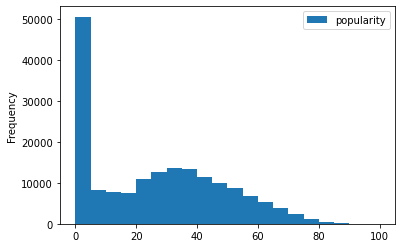

In [25]:
print('Mean:   {:,.3f}'.format(spotify[['popularity']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['popularity']].median().values[0]))
print('Mode:   {}'.format(spotify[['popularity']].mode().to_string(header=None,index=False)))
print('Skew:    {:,.3f}'.format(spotify[['popularity']].skew().values[0]))
spotify[['popularity']].plot(kind="hist", bins=20)

### Top 10 Songs by Popularity

In [26]:
spotify[['artists', 'name', 'popularity']].nlargest(10, 'popularity')
# spotify['artists'].value_counts().head(10)

,artists,name,popularity
20062,['Olivia Rodrigo'],drivers license,100
19862,"['24kGoldn', 'iann dior']",Mood (feat. iann dior),96
19866,['Ariana Grande'],positions,96
19886,"['Bad Bunny', 'Jhay Cortez']",DÁKITI,95
19976,['KAROL G'],BICHOTA,95
19868,['Ariana Grande'],34+35,94
19870,['CJ'],Whoopty,94
19872,['The Kid LAROI'],WITHOUT YOU,94
19876,['Billie Eilish'],Therefore I Am,94
19928,"['Bad Bunny', 'ROSALÍA']",LA NOCHE DE ANOCHE,94


### Bottom 10 Songs by Popularity

In [27]:
spotify[['artists', 'name', 'popularity']].nsmallest(10, 'popularity')

,artists,name,popularity
7,['Mamie Smith & Her Jazz Hounds'],Arkansas Blues,0
8,['Francisco Canaro'],La Chacarera - Remasterizado,0
9,['Meetya'],Broken Puppet - Original Mix,0
10,['Dorville'],Oouin,0
11,['Francisco Canaro'],Desengaño - Remasterizado,0
12,['Ka Koula'],Ta oula sou,0
13,['Justrock'],Schumacher,0
14,['Takis Nikolaou'],Mparmpaouzos,0
15,['Aggeliki Karagianni'],To katinaki,0
16,['Giorgos Katsaros'],Oli mera paizei zaria,0


### Speechiness:  
### Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words, such as audio-books. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

### Does not follow a normal distribution.  Appears to skew to the right.  Most of the speechiness occurs at the 0.0 range.

Mean:   0.106
Median: 0.045
Mode:   0.0337
Skew:   3.751


<AxesSubplot:ylabel='Frequency'>

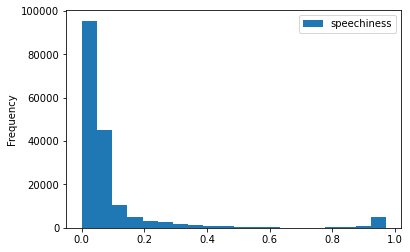

In [28]:
print('Mean:   {:,.3f}'.format(spotify[['speechiness']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['speechiness']].median().values[0]))
print('Mode:  {}'.format(spotify[['speechiness']].mode().to_string(header=None,index=False)))
print('Skew:   {:,.3f}'.format(spotify[['speechiness']].skew().values[0]))
spotify[['speechiness']].plot(kind="hist", bins=20)

### Top 10 Songs by Speechiness

In [29]:
spotify[['artists', 'name', 'speechiness']].nlargest(10, 'speechiness')

,artists,name,speechiness
162011,"['Harper Lee', 'Eva Mattes']","Wer die Nachtigall stört ..., Kapitel 1",0.971
25872,"['Ernest Hemingway', 'Christian Brückner']",Kapitel 15 - Der alte Mann und das Meer - Erzä...,0.970
25873,"['Ernest Hemingway', 'Christian Brückner']",Kapitel 16 - Der alte Mann und das Meer - Erzä...,0.970
40598,['Эрих Мария Ремарк'],Часть 38.4 & Часть 39.1 - Обратный путь,0.970
41619,['Tadeusz Dolega Mostowicz'],Chapter 16.9 - Doktor Murek zredukowany,0.969
44288,"['Georgette Heyer', 'Brigitte Carlsen']",Kapitel 220 - Die drei Ehen der Grand Sophy,0.969
44331,"['Georgette Heyer', 'Brigitte Carlsen']",Kapitel 174 - Die drei Ehen der Grand Sophy,0.969
62567,"['Georgette Heyer', 'Brigitte Carlsen']",Kapitel 187 - Die drei Ehen der Grand Sophy,0.969
62626,"['Georgette Heyer', 'Brigitte Carlsen']",Kapitel 262 - Die drei Ehen der Grand Sophy,0.969
77991,['Tadeusz Dolega Mostowicz'],Chapter 16.19 - Doktor Murek zredukowany,0.969


### Bottom 10 Songs by Speechiness

In [30]:
spotify[['artists', 'name', 'speechiness']].nsmallest(10, 'speechiness')

,artists,name,speechiness
758,['Ignacio Corsini'],La Mina del Ford - Remasterizado,0.0
845,['Francisco Canaro'],Oh Mujer Mujer - Remasterizado,0.0
860,['Ignacio Corsini'],Shangai Bay - Remasterizado,0.0
2820,['The Moors'],Santa Claus Is Coming To Town,0.0
3302,['Billie Holiday'],Back In Your Own Backyard - Take 1,0.0
3796,['MGM Studio Orchestra'],Munchkinland Insert - Alternate Tag,0.0
3806,"['Bert Lahr', 'Judy Garland', 'Ray Bolger', 'B...",If I Were King of the Forest - Partial Take; A...,0.0
4211,['The Slobs'],The Christmas Raid,0.0
5830,['Charlie Parker'],"Embraceable You - Live At Carnegie Hall, New Y...",0.0
8758,['Louis Armstrong'],"Hello, Dolly!",0.0


### Tempo:  
### The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

### *** Although the distribution almost looks normal.  Skews to the right, but not by much.  Can't explain why the mode is 0.  Requires further investigation. 

Mean:   117.006
Median: 115.816
Mode:     0.0
Skew:     0.423


<AxesSubplot:ylabel='Frequency'>

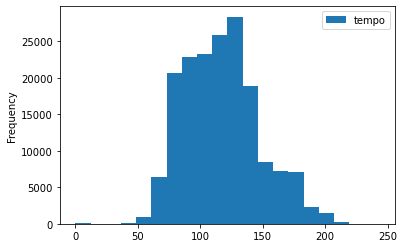

In [31]:
print('Mean:   {:,.3f}'.format(spotify[['tempo']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['tempo']].median().values[0]))
print('Mode:    {}'.format(spotify[['tempo']].mode().to_string(header=None,index=False)))
print('Skew:     {:,.3f}'.format(spotify[['tempo']].skew().values[0]))
spotify[['tempo']].plot(kind="hist", bins=20)

### Top 10 Songs by Tempo

In [32]:
spotify[['artists', 'name', 'tempo']].nlargest(10, 'tempo')

,artists,name,tempo
84474,['Bill Withers'],I Don't Want You on My Mind,243.507
29835,['J.J. Cale'],Call The Doctor,243.372
65985,['Bob Dylan'],Dear Landlord,238.895
29374,['Grateful Dead'],Candyman - 2013 Remaster,236.799
167770,['Suicide'],Surrender - 2005 Remastered Version,224.437
121924,['Portishead'],Undenied,222.605
156668,['Aviation Weather'],Sail over the Storm,221.954
2753,['Bimal Gupta'],Biyer Pare,221.741
136469,['Big Black'],L Dopa,221.112
3947,['Anestis Delias'],To xaremi sto xamam,221.058


### Bottom 10 Songs by Tempo

In [33]:
spotify[['artists', 'name', 'tempo']].nsmallest(10, 'tempo')

,artists,name,tempo
758,['Ignacio Corsini'],La Mina del Ford - Remasterizado,0.0
845,['Francisco Canaro'],Oh Mujer Mujer - Remasterizado,0.0
860,['Ignacio Corsini'],Shangai Bay - Remasterizado,0.0
2820,['The Moors'],Santa Claus Is Coming To Town,0.0
3302,['Billie Holiday'],Back In Your Own Backyard - Take 1,0.0
3796,['MGM Studio Orchestra'],Munchkinland Insert - Alternate Tag,0.0
3806,"['Bert Lahr', 'Judy Garland', 'Ray Bolger', 'B...",If I Were King of the Forest - Partial Take; A...,0.0
4211,['The Slobs'],The Christmas Raid,0.0
5830,['Charlie Parker'],"Embraceable You - Live At Carnegie Hall, New Y...",0.0
8758,['Louis Armstrong'],"Hello, Dolly!",0.0


### Valence: 
### A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

### Does not follow a normal distribution.  It appears to skew to the left.

Mean:   0.525
Median: 0.536
Mode:   0.961
Skew:  -0.101


<AxesSubplot:ylabel='Frequency'>

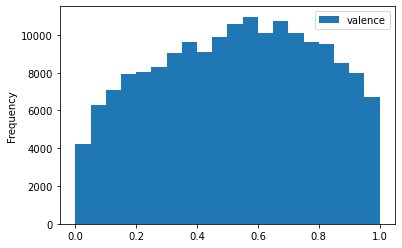

In [34]:
print('Mean:   {:,.3f}'.format(spotify[['valence']].mean().values[0]))
print('Median: {:,.3f}'.format(spotify[['valence']].median().values[0]))
print('Mode:  {}'.format(spotify[['valence']].mode().to_string(header=None,index=False)))
print('Skew:  {:,.3f}'.format(spotify[['valence']].skew().values[0]))
spotify[['valence']].plot(kind="hist", bins=20)

### Top 10 Songs by Valence

In [35]:
spotify[['artists', 'name', 'valence']].nlargest(10, 'valence')

,artists,name,valence
30791,['Raffi'],Les Petites Marionettes,1.000
41676,['Raymond Scott'],Chatter,1.000
54776,['Montez de Durango'],Pasito Duranguense,1.000
171107,['Spongebob Squarepants'],Electric Zoo,1.000
122536,['8-Bit Arcade'],2000 Light Years Away (8-Bit Computer Game Ver...,0.997
71335,['Barney'],Barney Theme Song,0.996
20720,['Iván Rolón'],Danza lenta,0.995
79099,"['Johann Sebastian Bach', 'Jascha Heifetz']","Violin Partita No. 3 in E Major, BWV 1006: VI....",0.995
72900,['Montez de Durango'],El Sube Y Baja,0.994
105316,['Banda El Recodo'],La Basurita,0.994


### Bottom 10 Songs by Valence

In [36]:
spotify[['artists', 'name', 'valence']].nsmallest(10, 'valence')

,artists,name,valence
758,['Ignacio Corsini'],La Mina del Ford - Remasterizado,0.0
845,['Francisco Canaro'],Oh Mujer Mujer - Remasterizado,0.0
860,['Ignacio Corsini'],Shangai Bay - Remasterizado,0.0
1217,['Iván Rolón'],"Cuatro melodías al unísono, No. III",0.0
2820,['The Moors'],Santa Claus Is Coming To Town,0.0
3302,['Billie Holiday'],Back In Your Own Backyard - Take 1,0.0
3796,['MGM Studio Orchestra'],Munchkinland Insert - Alternate Tag,0.0
3806,"['Bert Lahr', 'Judy Garland', 'Ray Bolger', 'B...",If I Were King of the Forest - Partial Take; A...,0.0
4211,['The Slobs'],The Christmas Raid,0.0
5830,['Charlie Parker'],"Embraceable You - Live At Carnegie Hall, New Y...",0.0


### Explicitness:
### Indicates if explicit language was used in the song.

### 93% of the songs were not explicit and 7% of the songs were explicit.

Not Explicit:   0.932
Explicit:       0.068


<AxesSubplot:>

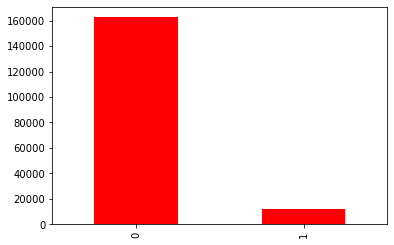

In [37]:
print('Not Explicit:   {:,.3f}'.format(spotify['explicit'].value_counts()[0]/spotify.shape[0]))
print('Explicit:       {:,.3f}'.format(spotify['explicit'].value_counts()[1]/spotify.shape[0]))
spotify['explicit'].value_counts().plot(kind='bar', color='red')

### Mode:
### Mode indicates the modality (major or minor) of a track, the type of scale from which melodic or harmonic content  is derived.  Major is represented by 1 and minor is 0.

### 70% of the melodic content has a major modality and 30% has a minor modality.

Major:   0.702
Minor:   0.298


<AxesSubplot:>

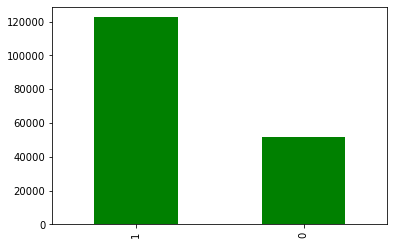

In [38]:
print('Major:   {:,.3f}'.format(spotify['mode'].value_counts()[1]/spotify.shape[0]))
print('Minor:   {:,.3f}'.format(spotify['mode'].value_counts()[0]/spotify.shape[0]))
spotify['mode'].value_counts().plot(kind='bar', color='green')

# Correlation Matrix

### After viewing the correlation matrix, there weren't any high correlation candidates for feature reduction.
### Acoustiness and energy appears to be the most significantly correlated, but still not enough for consideration.

<AxesSubplot:>

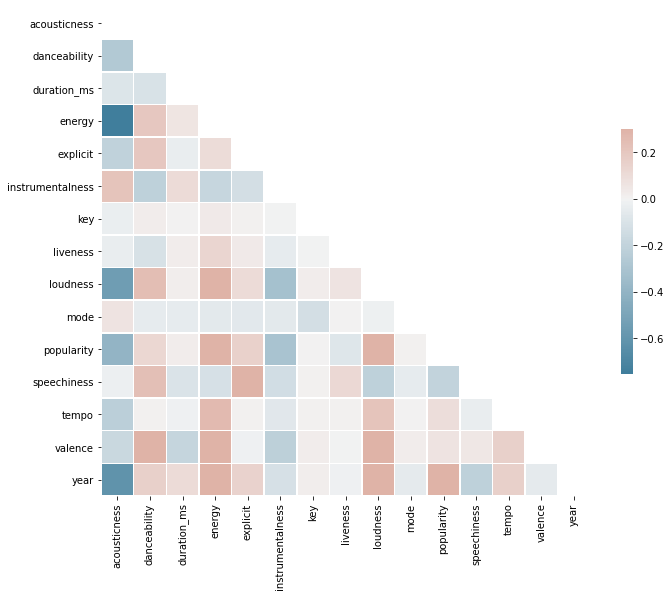

In [39]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix
spotify_corr = spotify.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(spotify_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(spotify_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Top Negative Correlations

In [40]:
spotify_corr.unstack().sort_values(kind="quicksort").head(14)[4:]

acousticness      loudness           -0.546639
loudness          acousticness       -0.546639
popularity        acousticness       -0.396744
acousticness      popularity         -0.396744
instrumentalness  loudness           -0.317562
loudness          instrumentalness   -0.317562
popularity        instrumentalness   -0.300625
instrumentalness  popularity         -0.300625
danceability      acousticness       -0.263217
acousticness      danceability       -0.263217
dtype: float64

### Top Positive Correlations

In [41]:
spotify_corr.unstack().sort_values(kind="quicksort", ascending=False).head(26)[16:]

energy        loudness        0.779267
              year            0.540850
year          energy          0.540850
valence       danceability    0.536713
danceability  valence         0.536713
popularity    year            0.513227
year          popularity      0.513227
loudness      year            0.465189
year          loudness        0.465189
speechiness   explicit        0.353872
dtype: float64